In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Using PCA For Image Compression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

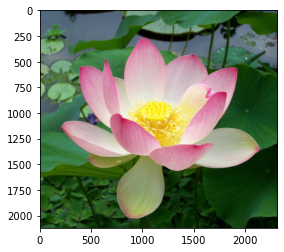

In [3]:
img = cv2.cvtColor(cv2.imread('C:/Users/HP/OneDrive/Desktop/Sacred_lotus_Nelumbo_nucifera.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
img.shape

(2119, 2312, 3)

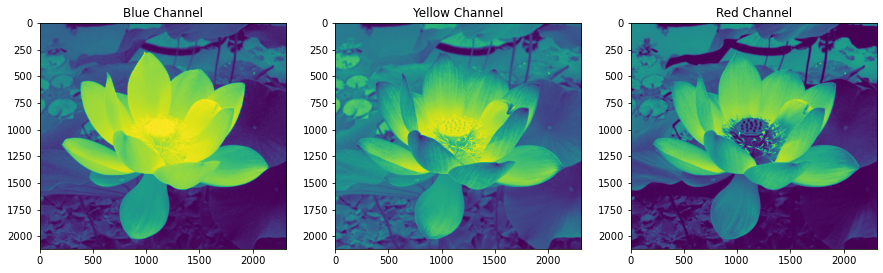

In [5]:
#Splitting into primary colours
blue,yellow,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Yellow Channel")
plt.imshow(yellow)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [7]:
yellow_df = pd.DataFrame(data = yellow)
yellow_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2302,2303,2304,2305,2306,2307,2308,2309,2310,2311
0,163,164,165,162,168,160,163,162,163,163,...,178,178,181,178,176,178,176,178,176,178
1,90,107,87,91,95,93,91,95,97,92,...,15,10,48,11,21,20,21,18,18,21
2,86,123,110,98,92,112,103,108,104,101,...,52,55,49,48,45,48,48,45,44,50
3,96,109,114,110,105,102,103,102,104,101,...,48,50,55,53,57,56,56,61,53,57
4,96,88,89,105,103,101,105,102,101,102,...,61,60,62,62,55,53,54,53,50,62


## Scaling

In [8]:
df_blue = blue/255
df_yellow = yellow/255
df_red = red/255

## Using PCA

In [19]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_y = PCA(n_components=50)
pca_y.fit(df_yellow)
trans_pca_y = pca_y.transform(df_yellow)

pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_y.shape)

(2119, 50)
(2119, 50)
(2119, 50)


### Explained Variance Ratio

In [20]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Yellow Channel: {sum(pca_y.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9844296919650889
Yellow Channel: 0.9718314865732324
Red Channel  : 0.97271607152798


### Only using 50 components we can keep around 98% of the variance in the data.

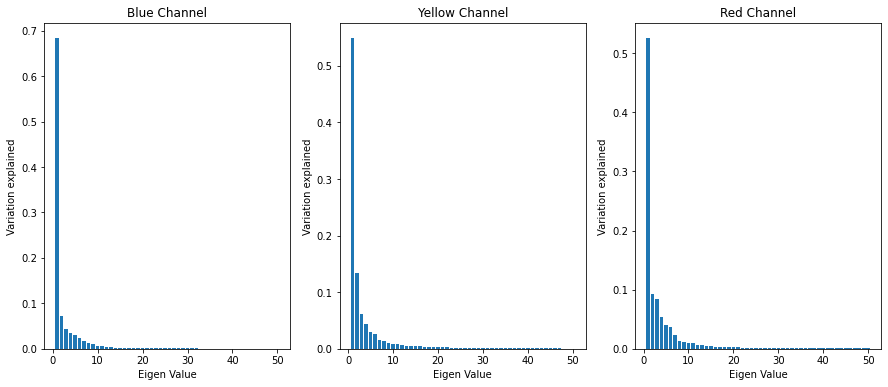

In [21]:
fig = plt.figure(figsize = (15, 6)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Yellow Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_y.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

### Reconstruct to validate and visualize

**PCA dimensionality reduction is completed. Now visualizing the image again and for that, we have to reverse transform the data first and then merge the data of all the 3 channels into one**

In [22]:
b_arr = pca_b.inverse_transform(trans_pca_b)
y_arr = pca_y.inverse_transform(trans_pca_y)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, y_arr.shape, r_arr.shape)

(2119, 2312) (2119, 2312) (2119, 2312)


**We can inverse transform the data to the original shape (although each channel is still separated) and then merge it to produce the compressed image**

In [23]:
img_reduced= cv2.merge((b_arr, y_arr, r_arr))
print(img_reduced.shape)

(2119, 2312, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


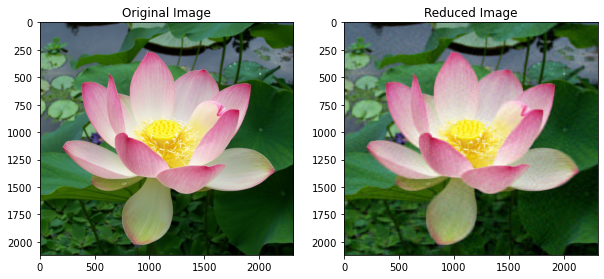

In [24]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()